In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Dataset.csv'
df = pd.read_csv(file_path)

# Check initial shape of the dataset
print("Initial Dataset Shape:", df.shape)

# Display the first few rows to get an overview
df.head()


Initial Dataset Shape: (200031, 22)


C:\Users\pvg2\AppData\Local\Temp\ipykernel_10700\2723754052.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,index,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,2,1,2,2,09/06/2020,1,2,55,?,...,2,2,2,2,2,2,2,2,3,2.0
1,5,2,1,1,2,9999-99-99,2,1,40,2,...,2,2,2,2,2,2,2,2,3,2.0
2,8,2,1,1,2,9999-99-99,2,2,37,2,...,2,2,1,2,2,1,2,2,3,2.0
3,9,2,1,1,2,9999-99-99,2,2,25,2,...,2,2,2,2,2,2,2,2,3,2.0
4,11,2,1,2,2,9999-99-99,2,2,24,?,...,2,2,2,2,2,2,2,2,3,2.0


#Step 2: Identify and Handle Missing Values

In [2]:
# Convert "?" to NaN
df.replace("?", pd.NA, inplace=True)

# Count missing values before handling
print("Missing values before handling:\n", df.isna().sum())

Missing values before handling:
 index                        0
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                   7325
PNEUMONIA                 5144
AGE                          0
PREGNANT                118792
DIABETES                  1195
COPD                      1064
ASTHMA                    1066
INMSUPR                   1280
HIPERTENSION              1106
OTHER_DISEASE             2074
CARDIOVASCULAR            1143
OBESITY                   1113
RENAL_CHRONIC             1074
TOBACCO                   1126
CLASIFFICATION_FINAL         0
ICU                       7488
dtype: int64


In [3]:
df.isnull().sum()

index                        0
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                   7325
PNEUMONIA                 5144
AGE                          0
PREGNANT                118792
DIABETES                  1195
COPD                      1064
ASTHMA                    1066
INMSUPR                   1280
HIPERTENSION              1106
OTHER_DISEASE             2074
CARDIOVASCULAR            1143
OBESITY                   1113
RENAL_CHRONIC             1074
TOBACCO                   1126
CLASIFFICATION_FINAL         0
ICU                       7488
dtype: int64

#Step 3: Remove Irrelevant Columns

In [4]:
# Drop columns only if they exist
irrelevant_columns = ['MEDICAL_UNIT', 'USMER', 'DATE_DIED']
df.drop(columns=[col for col in irrelevant_columns if col in df.columns], inplace=True)
df

,index,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,2,2,1,2,55,<NA>,1,2,2,2,2,2,2,2,2,2,3,2.0
1,5,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2.0
2,8,1,2,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2.0
3,9,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2.0
4,11,2,2,2,2,24,<NA>,2,2,2,2,2,2,2,2,2,2,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,1048553,1,2,2,1,61,2,1,2,2,2,1,2,2,2,2,2,7,2.0
200027,1048554,1,2,2,1,63,2,2,2,1,2,2,2,2,1,2,2,7,2.0
200028,1048567,1,2,2,2,23,2,1,2,2,2,2,2,2,1,2,2,7,2.0
200029,1048569,1,2,2,2,56,2,1,2,2,2,2,2,2,2,2,2,7,2.0


In [5]:
df.isnull().sum()

index                        0
SEX                          0
PATIENT_TYPE                 0
INTUBED                   7325
PNEUMONIA                 5144
AGE                          0
PREGNANT                118792
DIABETES                  1195
COPD                      1064
ASTHMA                    1066
INMSUPR                   1280
HIPERTENSION              1106
OTHER_DISEASE             2074
CARDIOVASCULAR            1143
OBESITY                   1113
RENAL_CHRONIC             1074
TOBACCO                   1126
CLASIFFICATION_FINAL         0
ICU                       7488
dtype: int64

In [6]:
# Remove null values
df.dropna(inplace=True)

# Impute missing values
# For numerical columns, replace NaN with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, replace NaN with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check missing values after handling
print("\nMissing Values After Handling:")
print(df.isna().sum())



Missing Values After Handling:
index                   0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


C:\Users\pvg2\AppData\Local\Temp\ipykernel_10700\1042906358.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\pvg2\AppData\Local\Temp\ipykernel_10700\1042906358.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [7]:
df

,index,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,5,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2.0
2,8,1,2,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2.0
3,9,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2.0
6,16,1,2,2,1,80,2,2,2,2,2,1,2,2,2,2,2,3,1.0
12,56,1,2,1,1,58,2,2,2,2,2,1,2,1,1,2,2,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200023,1048535,1,2,2,2,79,2,2,2,2,2,1,2,2,2,2,2,7,2.0
200026,1048553,1,2,2,1,61,2,1,2,2,2,1,2,2,2,2,2,7,2.0
200027,1048554,1,2,2,1,63,2,2,2,1,2,2,2,2,1,2,2,7,2.0
200028,1048567,1,2,2,2,23,2,1,2,2,2,2,2,2,1,2,2,7,2.0


In [8]:
df.head()

,index,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,5,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2.0
2,8,1,2,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2.0
3,9,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2.0
6,16,1,2,2,1,80,2,2,2,2,2,1,2,2,2,2,2,3,1.0
12,56,1,2,1,1,58,2,2,2,2,2,1,2,1,1,2,2,7,1.0


In [9]:
#summary of data
df.describe()
# Identify outliers using Interquartile Range (IQR)
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
filtered_df = df[~((df['AGE'] < (Q1 - 1.5 * IQR)) | (df['AGE'] > (Q3 + 1.5 * IQR)))]

print("Shape After Removing Outliers:", filtered_df.shape)


Shape After Removing Outliers: (75095, 19)


In [10]:
df

,index,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,5,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2.0
2,8,1,2,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2.0
3,9,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2.0
6,16,1,2,2,1,80,2,2,2,2,2,1,2,2,2,2,2,3,1.0
12,56,1,2,1,1,58,2,2,2,2,2,1,2,1,1,2,2,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200023,1048535,1,2,2,2,79,2,2,2,2,2,1,2,2,2,2,2,7,2.0
200026,1048553,1,2,2,1,61,2,1,2,2,2,1,2,2,2,2,2,7,2.0
200027,1048554,1,2,2,1,63,2,2,2,1,2,2,2,2,1,2,2,7,2.0
200028,1048567,1,2,2,2,23,2,1,2,2,2,2,2,2,1,2,2,7,2.0


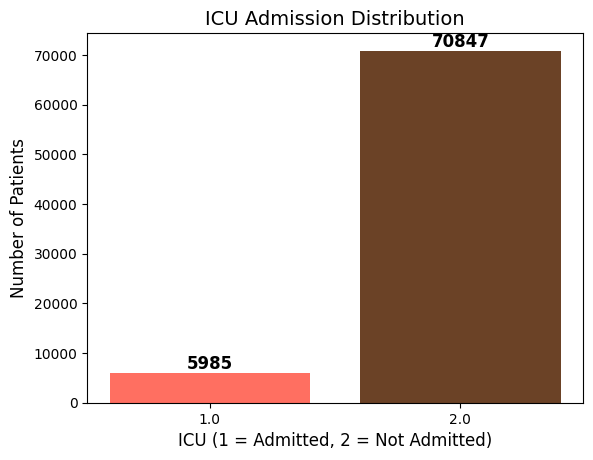

In [11]:
import pandas as pd
import matplotlib.pyplot as plt



# ICU Admission Distribution
icu_counts = df['ICU'].value_counts().sort_index()
bars = plt.bar(icu_counts.index, icu_counts.values, color=['#FF6F61', '#6B4226'])

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('ICU Admission Distribution', fontsize=14)
plt.xlabel('ICU (1 = Admitted, 2 = Not Admitted)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()



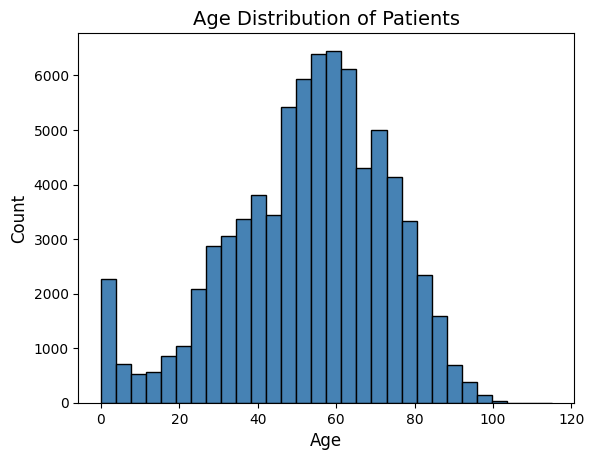

In [12]:
# Age Distribution
plt.hist(df['AGE'], bins=30, color='#4682B4', edgecolor='black')
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


C:\Users\pvg2\AppData\Local\Temp\ipykernel_10700\3986132622.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icu_by_age = df.groupby('age_group')['ICU'].value_counts().unstack().fillna(0)


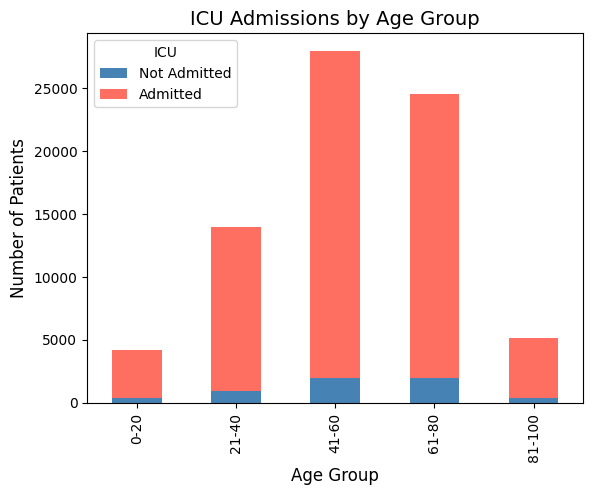

In [13]:
# Create Age Groups
df['age_group'] = pd.cut(df['AGE'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
icu_by_age = df.groupby('age_group')['ICU'].value_counts().unstack().fillna(0)

# Plot ICU by Age Group
icu_by_age.plot(kind='bar', stacked=True, color=['#4682B4', '#FF6F61'])
plt.title('ICU Admissions by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='ICU', labels=['Not Admitted', 'Admitted'])
plt.show()


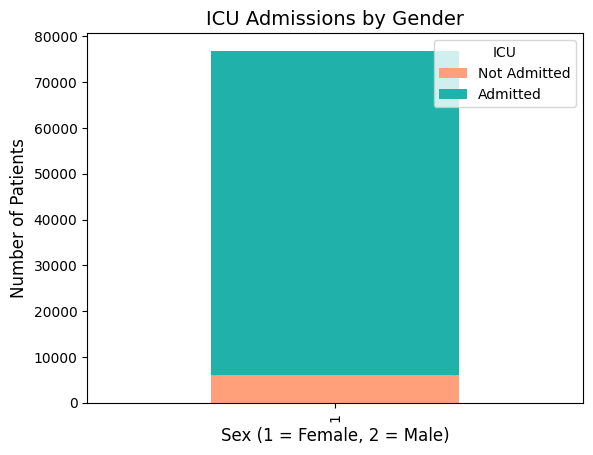

In [14]:
# ICU Admissions by Gender
icu_by_sex = df.groupby('SEX')['ICU'].value_counts().unstack().fillna(0)
icu_by_sex.plot(kind='bar', stacked=True, color=['#FFA07A', '#20B2AA'])
plt.title('ICU Admissions by Gender', fontsize=14)
plt.xlabel('Sex (1 = Female, 2 = Male)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='ICU', labels=['Not Admitted', 'Admitted'])
plt.show()


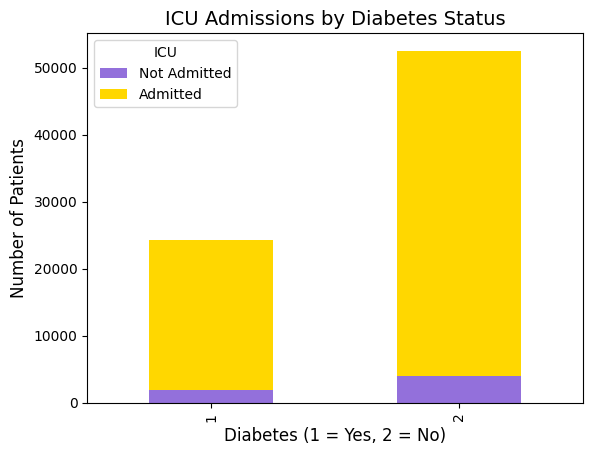

In [15]:
# ICU Admissions by Diabetes
icu_by_diabetes = df.groupby('DIABETES')['ICU'].value_counts().unstack().fillna(0)
icu_by_diabetes.plot(kind='bar', stacked=True, color=['#9370DB', '#FFD700'])
plt.title('ICU Admissions by Diabetes Status', fontsize=14)
plt.xlabel('Diabetes (1 = Yes, 2 = No)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='ICU', labels=['Not Admitted', 'Admitted'])
plt.show()


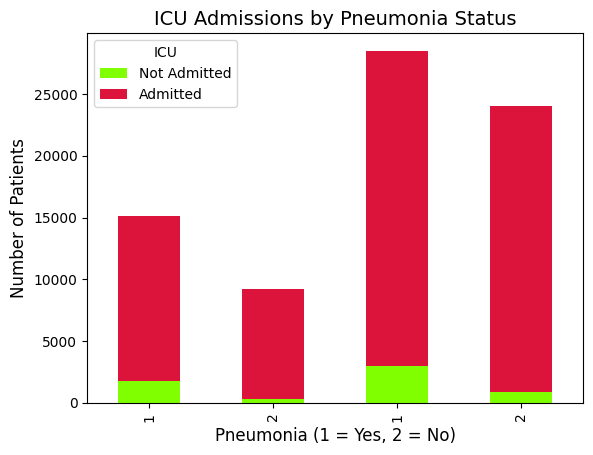

In [16]:
# ICU Admissions by Pneumonia
icu_by_pneumonia = df.groupby('PNEUMONIA')['ICU'].value_counts().unstack().fillna(0)
icu_by_pneumonia.plot(kind='bar', stacked=True, color=['#7FFF00', '#DC143C'])
plt.title('ICU Admissions by Pneumonia Status', fontsize=14)
plt.xlabel('Pneumonia (1 = Yes, 2 = No)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='ICU', labels=['Not Admitted', 'Admitted'])
plt.show()


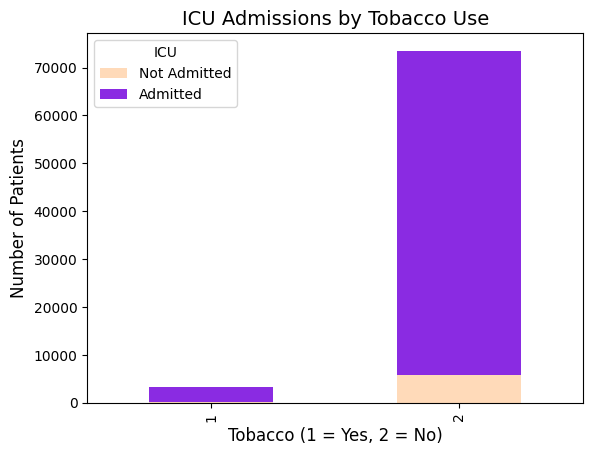

In [17]:
# ICU Admissions by Tobacco
icu_by_tobacco = df.groupby('TOBACCO')['ICU'].value_counts().unstack().fillna(0)
icu_by_tobacco.plot(kind='bar', stacked=True, color=['#FFDAB9', '#8A2BE2'])
plt.title('ICU Admissions by Tobacco Use', fontsize=14)
plt.xlabel('Tobacco (1 = Yes, 2 = No)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='ICU', labels=['Not Admitted', 'Admitted'])
plt.show()


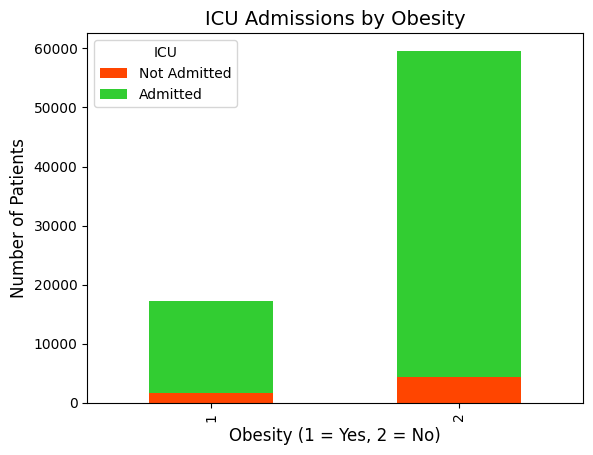

In [18]:
# ICU Admissions by Obesity
icu_by_obesity = df.groupby('OBESITY')['ICU'].value_counts().unstack().fillna(0)
icu_by_obesity.plot(kind='bar', stacked=True, color=['#FF4500', '#32CD32'])
plt.title('ICU Admissions by Obesity', fontsize=14)
plt.xlabel('Obesity (1 = Yes, 2 = No)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='ICU', labels=['Not Admitted', 'Admitted'])
plt.show()


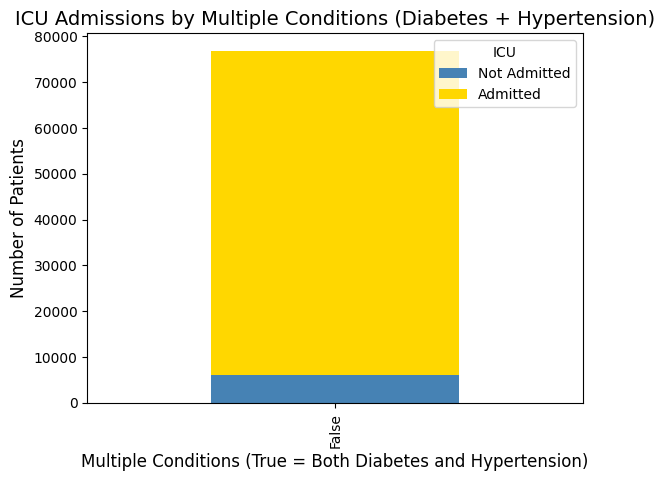

In [19]:
# Multiple Conditions (Diabetes + Hypertension)
df['multiple_conditions'] = (df['DIABETES'] == 1) & (df['HIPERTENSION'] == 1)
icu_by_multi_cond = df.groupby('multiple_conditions')['ICU'].value_counts().unstack().fillna(0)
icu_by_multi_cond.plot(kind='bar', stacked=True, color=['#4682B4', '#FFD700'])
plt.title('ICU Admissions by Multiple Conditions (Diabetes + Hypertension)', fontsize=14)
plt.xlabel('Multiple Conditions (True = Both Diabetes and Hypertension)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='ICU', labels=['Not Admitted', 'Admitted'])
plt.show()


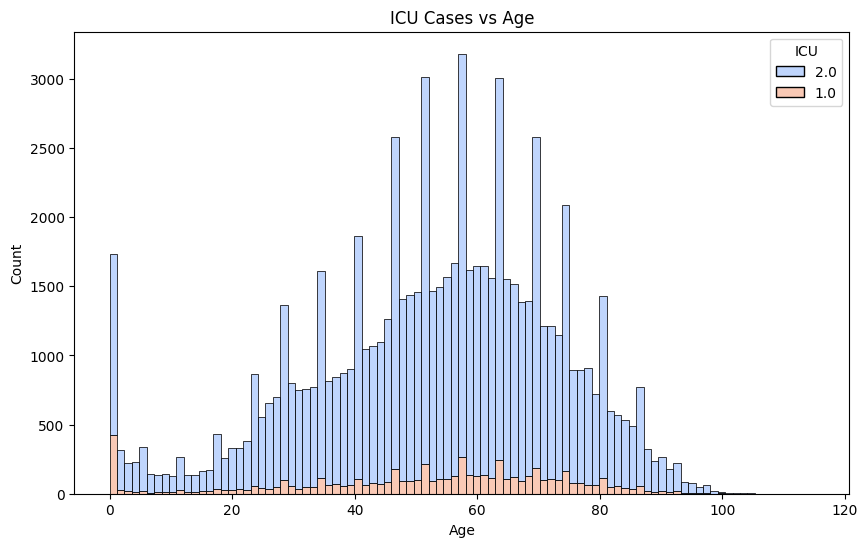

In [20]:

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Plot ICU Cases vs Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='ICU', multiple='stack', palette='coolwarm', kde=False)
plt.title('ICU Cases vs Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


C:\Users\pvg2\AppData\Local\Temp\ipykernel_10700\3159311658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLASIFFICATION_FINAL', data=df, palette='Set2')


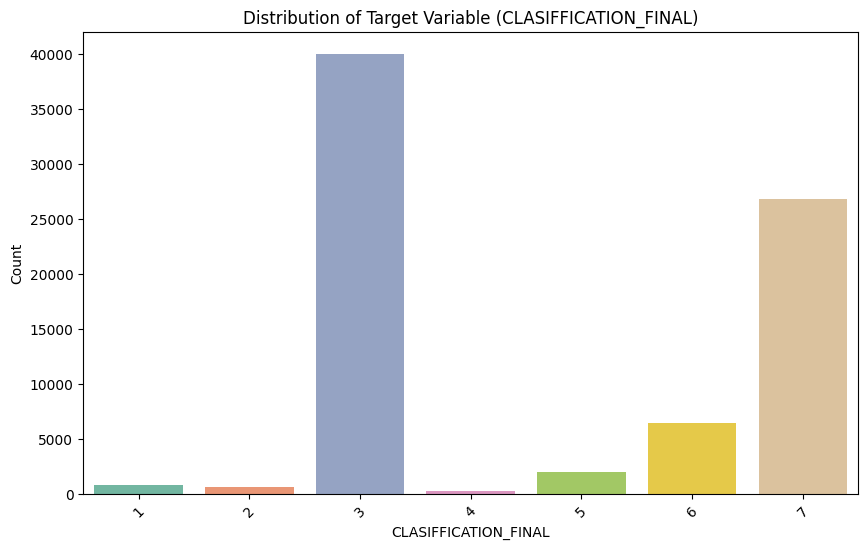

In [21]:


# Plot the distribution of the target variable "CLASIFFICATION_FINAL"
plt.figure(figsize=(10, 6))
sns.countplot(x='CLASIFFICATION_FINAL', data=df, palette='Set2')
plt.title('Distribution of Target Variable (CLASIFFICATION_FINAL)')
plt.xlabel('CLASIFFICATION_FINAL')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


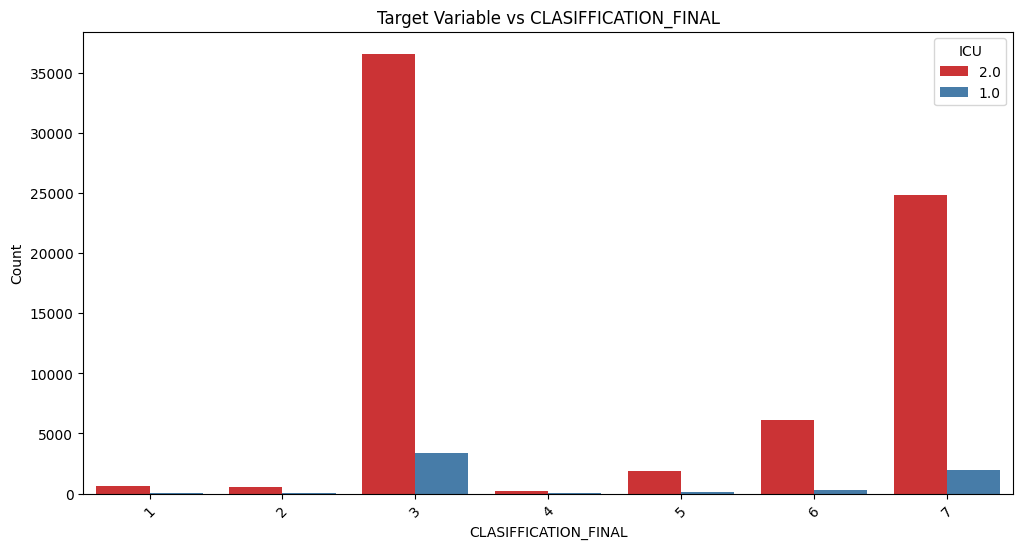

In [22]:

# Plot Target Variable vs CLASIFFICATION_FINAL
plt.figure(figsize=(12, 6))
sns.countplot(x='CLASIFFICATION_FINAL', hue='ICU', data=df, palette='Set1')
plt.title('Target Variable vs CLASIFFICATION_FINAL')
plt.xlabel('CLASIFFICATION_FINAL')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='ICU')
plt.show()


Model Building

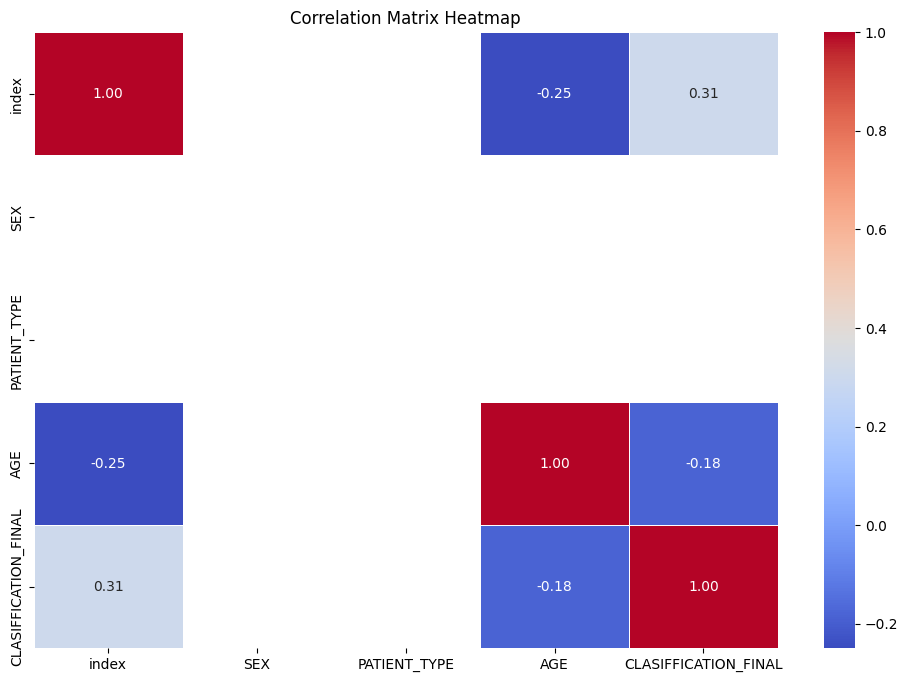

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to numerical if necessary
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


<Figure size 1200x1200 with 0 Axes>

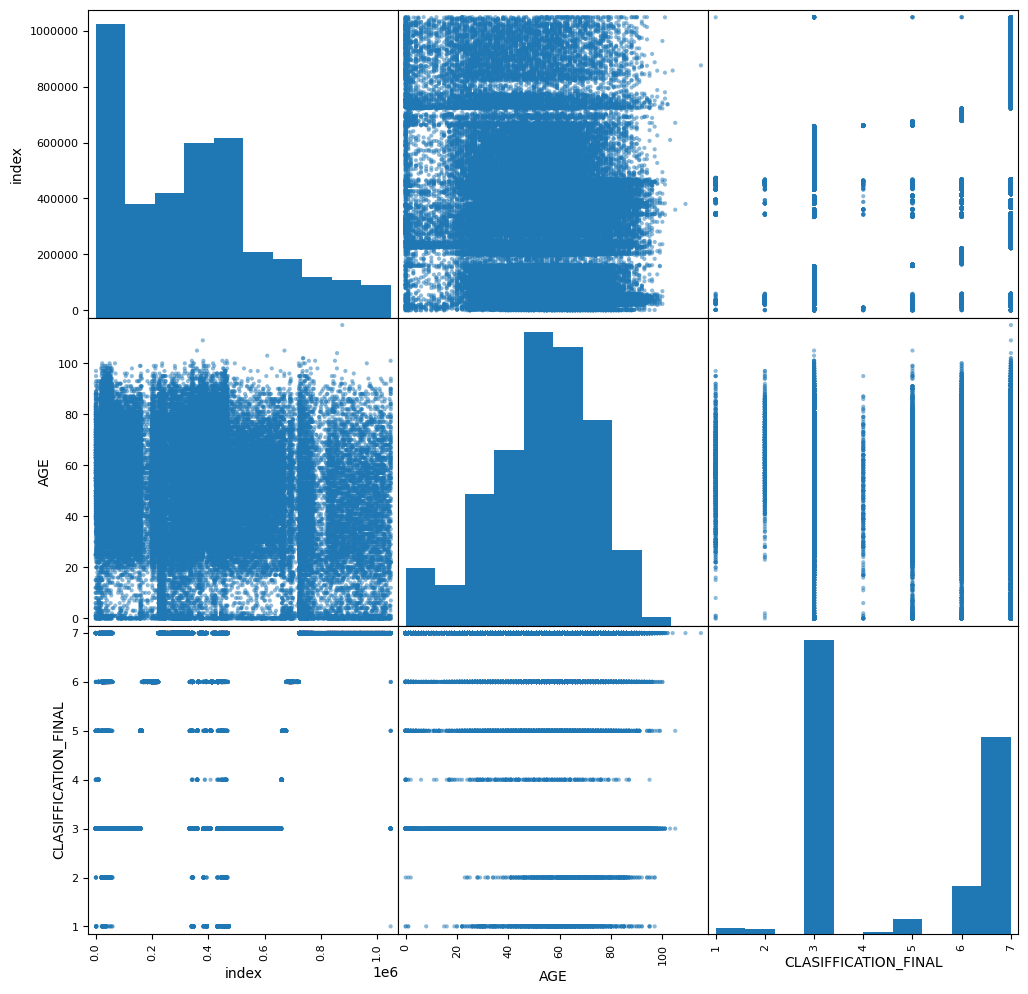

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Drop constant columns (if any)
df_numeric = df_numeric.loc[:, df_numeric.nunique() > 1]

# If too many columns, select a subset (first 6 columns as an example)
df_numeric = df_numeric.iloc[:, :6] if df_numeric.shape[1] > 6 else df_numeric

# Plot scatter matrix
plt.figure(figsize=(12, 12))
scatter_matrix(df_numeric, figsize=(12, 12), diagonal='hist', alpha=0.5)
plt.show()


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE


In [26]:
# Select pridictor and Target variable
# Drop irrelevant columns
df = df.drop(columns=['index'], errors='ignore')

# Define predictors and target
predictors = [
    'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES',
    'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
    'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'
]
target = 'ICU'

X = df[predictors]
y = df[target]

# Handle missing values if needed
X = X.fillna(X.median())
# Split data and scale features

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for better performance in logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [27]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
print("Initial Model Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Initial Model Performance:

Accuracy: 0.9227565562569142
Precision: 0.9007411052358584
F1-Score: 0.8880289826152447
ROC AUC: 0.5095310612452091
Confusion Matrix:
 [[   24  1173]
 [   14 14156]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.63      0.02      0.04      1197
         2.0       0.92      1.00      0.96     14170

    accuracy                           0.92     15367
   macro avg       0.78      0.51      0.50     15367
weighted avg       0.90      0.92      0.89     15367



In [28]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train model on balanced data
balanced_model = LogisticRegression(max_iter=1000)
balanced_model.fit(X_resampled, y_resampled)

# Make predictions
y_balanced_pred = balanced_model.predict(X_test_scaled)

# Evaluate balanced model
print("\nBalanced Model Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_balanced_pred))
print("ROC AUC:", roc_auc_score(y_test, y_balanced_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_balanced_pred))
print("Classification Report:\n", classification_report(y_test, y_balanced_pred))



Balanced Model Performance:

Accuracy: 0.7898744061950934
ROC AUC: 0.6952319637013022
Precision: 0.9007411052358584
F1-Score: 0.8880289826152447
Confusion Matrix:
 [[  698   499]
 [ 2730 11440]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.20      0.58      0.30      1197
         2.0       0.96      0.81      0.88     14170

    accuracy                           0.79     15367
   macro avg       0.58      0.70      0.59     15367
weighted avg       0.90      0.79      0.83     15367



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Set plot size
plt.rcParams['figure.figsize'] = (8, 6)


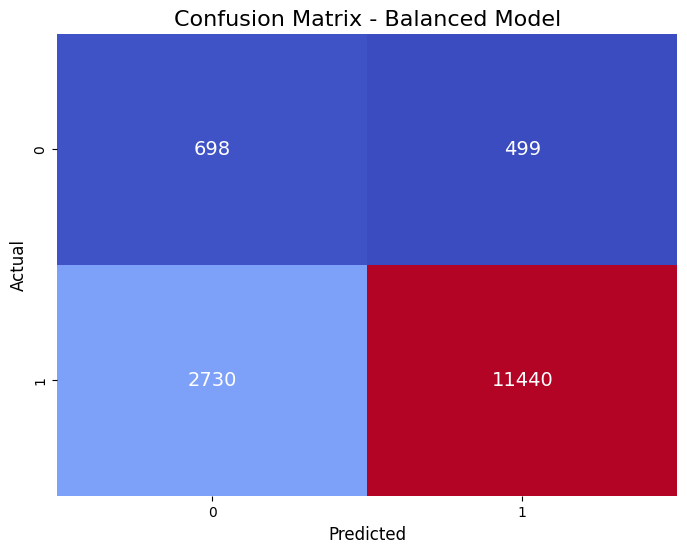

In [30]:
# Confusion Matrix for Balanced Model
conf_matrix = confusion_matrix(y_test, y_balanced_pred)

# Plot heatmap
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - Balanced Model', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()



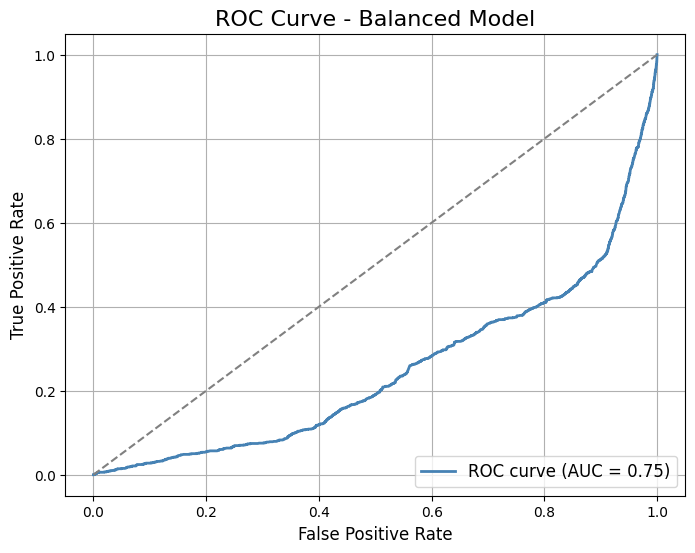

In [31]:
# Convert y_test to integers by first converting to float, then to int
y_test = y_test.astype(float).astype(int)

# Get predicted probabilities for the positive class (1)
y_probs = balanced_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, color='#4682B4', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal for random guessing
plt.title('ROC Curve - Balanced Model', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()



In [32]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, when, isnan, count

# Step 1: Initialize Spark Session
spark = SparkSession.builder.appName("KMeans_Clustering").getOrCreate()

# Step 2: Load Data
df = spark.read.csv("Dataset.csv", header=True, inferSchema=True)

# Convert "?" to Null (PySpark Corrected)
df = df.replace("?", None)

# Drop Irrelevant Columns (PySpark Corrected)
irrelevant_columns = ['MEDICAL_UNIT', 'USMER', 'DATE_DIED']
df = df.drop(*irrelevant_columns)

# Step 3: Handle Categorical Columns
string_cols = ["INTUBED", "PNEUMONIA", "PREGNANT", "DIABETES",
               "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE",
               "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]

existing_string_cols = [col_name for col_name in string_cols if col_name in df.columns]

for col_name in existing_string_cols:
    indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_indexed", handleInvalid="keep")
    df = indexer.fit(df).transform(df)

df = df.drop(*existing_string_cols)

# Step 4: Convert ICU to Integer and Make It Binary
if "ICU" in df.columns:
    df = df.withColumn("ICU", col("ICU").cast("integer"))
    df = df.withColumn("ICU", when(col("ICU") == 0, 0).otherwise(1))  # Convert to binary (0 or 1)

# Step 5: Remove Null/NaN Values from "ICU"
df = df.na.drop(subset=["ICU"])  # Remove nulls
df = df.filter(~isnan(col("ICU")))  # Remove NaNs

# Debug: Check if "ICU" column still has NaNs or Nulls
df.select([count(when(col("ICU").isNull(), 1)).alias("null_count"),
           count(when(isnan(col("ICU")), 1)).alias("nan_count")]).show()

# Step 6: Define Features for Clustering
feature_cols = [c for c in df.columns if c not in ["ICU"]]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

# Step 7: Drop "prediction" column if it exists
if "prediction" in df.columns:
    df = df.drop("prediction")

# Step 8: Standardize Features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

# ✅ Step 9: Apply K-Means Clustering
kmeans = KMeans(featuresCol="scaled_features", k=3, seed=42)
kmeans_model = kmeans.fit(df)
df = kmeans_model.transform(df)  # Adds a new "prediction" column

# Step 10: Train Logistic Regression for each cluster
evaluator = BinaryClassificationEvaluator(labelCol="ICU", metricName="areaUnderROC")
lr = LogisticRegression(featuresCol="scaled_features", labelCol="ICU", maxIter=10)

for i in range(3):
    cluster_df = df.filter(col("prediction") == i)

    if cluster_df.count() > 0:
        train, test = cluster_df.randomSplit([0.8, 0.2], seed=42)

        # Drop "prediction" before training
        train = train.drop("prediction")
        test = test.drop("prediction")

        # Train Logistic Regression
        model = lr.fit(train)
        predictions = model.transform(test)
        auc = evaluator.evaluate(predictions)
        print(f"Cluster {i} Model AUC: {auc:.4f}")

# ✅ Step 11: Show Cluster Counts
df.groupBy("prediction").count().show()


+----------+---------+
|null_count|nan_count|
+----------+---------+
|         0|        0|
+----------+---------+

Cluster 0 Model AUC: 1.0000
Cluster 1 Model AUC: 1.0000
Cluster 2 Model AUC: 1.0000
+----------+------+
|prediction| count|
+----------+------+
|         1|  1032|
|         2|  7452|
|         0|191547|
+----------+------+



In [33]:
df.show()

+-----+---+------------+---+--------------------+---+---------------+-----------------+----------------+----------------+------------+--------------+---------------+--------------------+---------------------+----------------------+---------------+---------------------+---------------+--------------------+--------------------+----------+
|index|SEX|PATIENT_TYPE|AGE|CLASIFFICATION_FINAL|ICU|INTUBED_indexed|PNEUMONIA_indexed|PREGNANT_indexed|DIABETES_indexed|COPD_indexed|ASTHMA_indexed|INMSUPR_indexed|HIPERTENSION_indexed|OTHER_DISEASE_indexed|CARDIOVASCULAR_indexed|OBESITY_indexed|RENAL_CHRONIC_indexed|TOBACCO_indexed|            features|     scaled_features|prediction|
+-----+---+------------+---+--------------------+---+---------------+-----------------+----------------+----------------+------------+--------------+---------------+--------------------+---------------------+----------------------+---------------+---------------------+---------------+--------------------+----------------

C:\Users\pvg2\AppData\Local\Temp\ipykernel_10700\164734412.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_pandas["prediction"], palette="coolwarm")


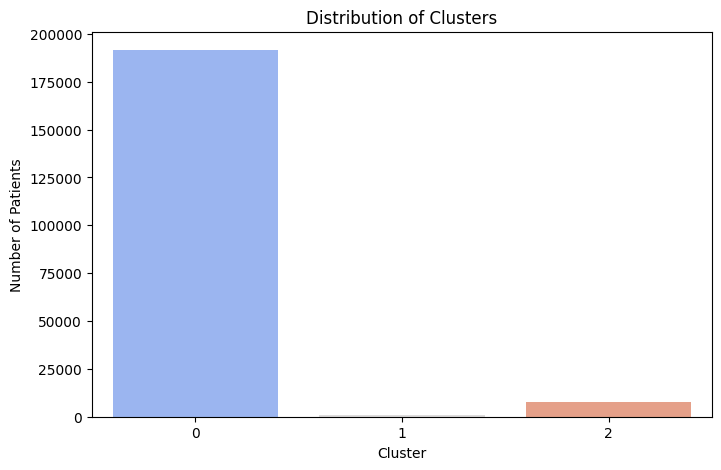

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas for Visualization
df_pandas = df.select("ICU", "prediction").toPandas()

# Plot Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_pandas["prediction"], palette="coolwarm")
plt.title("Distribution of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Patients")
plt.show()


In [35]:
# ✅ Drop the "prediction" column before training Logistic Regression
if "prediction" in df.columns:
    df = df.drop("prediction")


In [36]:
# ✅ Train Global Model (without clustering)
if "prediction" in df.columns:
    df = df.drop("prediction")  # Drop existing "prediction" column

train_global, test_global = df.randomSplit([0.8, 0.2], seed=42)
global_model = LogisticRegression(featuresCol="scaled_features", labelCol="ICU", maxIter=10)
global_trained = global_model.fit(train_global)
global_predictions = global_trained.transform(test_global)
auc_global = evaluator.evaluate(global_predictions)


In [37]:
# Train Local Models (One for Each Cluster)
auc_scores = []
for i in range(3):
    cluster_df = df.filter(col("prediction") == i)

    if cluster_df.count() > 0:
        train, test = cluster_df.randomSplit([0.8, 0.2], seed=42)

        # Drop "prediction" before training
        train = train.drop("prediction") if "prediction" in train.columns else train
        test = test.drop("prediction") if "prediction" in test.columns else test

        model = LogisticRegression(featuresCol="scaled_features", labelCol="ICU", maxIter=10)
        trained_model = model.fit(train)
        predictions = trained_model.transform(test)
        auc = evaluator.evaluate(predictions)
        auc_scores.append((i, auc))


In [38]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col

def compute_metrics(predictions, model_name):
    evaluator_acc = MulticlassClassificationEvaluator(labelCol="ICU", predictionCol="prediction", metricName="accuracy")
    evaluator_precision = MulticlassClassificationEvaluator(labelCol="ICU", predictionCol="prediction", metricName="weightedPrecision")
    evaluator_recall = MulticlassClassificationEvaluator(labelCol="ICU", predictionCol="prediction", metricName="weightedRecall")
    evaluator_f1 = MulticlassClassificationEvaluator(labelCol="ICU", predictionCol="prediction", metricName="f1")

    accuracy = evaluator_acc.evaluate(predictions)
    precision = evaluator_precision.evaluate(predictions)
    recall = evaluator_recall.evaluate(predictions)
    f1_score = evaluator_f1.evaluate(predictions)

    print(f"\n {model_name} Metrics:")
    print(f" Accuracy: {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1 Score: {f1_score:.4f}")

    return accuracy, precision, recall, f1_score


In [ ]:
# Compute metrics for local models
local_metrics = []
for i in range(3):
    cluster_df = df.filter(col("prediction") == i)

    if cluster_df.count() > 0:
        train, test = cluster_df.randomSplit([0.8, 0.2], seed=42)
        train = train.drop("prediction") if "prediction" in train.columns else train
        test = test.drop("prediction") if "prediction" in test.columns else test

        model = LogisticRegression(featuresCol="scaled_features", labelCol="ICU", maxIter=10)
        trained_model = model.fit(train)
        predictions = trained_model.transform(test)

        accuracy, precision, recall, f1_score = compute_metrics(predictions, f"Cluster {i} Model")
        local_metrics.append((i, accuracy, precision, recall, f1_score))



 Cluster 0 Model Metrics:
 Accuracy: 1.0000
 Precision: 1.0000
 Recall: 1.0000
 F1 Score: 1.0000


In [ ]:
# Compute metrics for the Global Model
global_accuracy, global_precision, global_recall, global_f1 = compute_metrics(global_predictions, "Global Model")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert local model metrics to Pandas DataFrame
metrics_df = pd.DataFrame(local_metrics, columns=["Cluster", "Accuracy", "Precision", "Recall", "F1 Score"])

# Ensure global model metrics are defined before adding them to the dataframe
global_accuracy, global_precision, global_recall, global_f1 = compute_metrics(global_predictions, "Global Model")

# Add Global Model metrics to the DataFrame
global_row = pd.DataFrame([["Global Model", global_accuracy, global_precision, global_recall, global_f1]],
                          columns=["Cluster", "Accuracy", "Precision", "Recall", "F1 Score"])
metrics_df = pd.concat([global_row, metrics_df], ignore_index=True)

# Print the results
print(metrics_df)

# Plot Accuracy Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_df["Cluster"], y=metrics_df["Accuracy"], palette="viridis")
plt.title("Accuracy Comparison: Global vs. Local Models")
plt.xlabel("Model (Global vs. Clusters)")
plt.ylabel("Accuracy Score")
plt.show()
